# Predicting University Admission using Multiple Linear Regression

### In this project a regression model is built to predict the chance of admission into a particular university based on students profile
##  Input
- GRE scores(out of 340)
- TOFEL scores(out of 120)
- University rating (out of 5)
- Statement of purpose (SOP)
- Letter of Recomendation Strength(out of 5)
- Undergraduate GPA(out of 10)
- Research experience (either 0 or 1)
## Output
- Chance of admission(ranging from 0 to 1)

### Data Source:https://www.kaggle.com/mohansacharya/graduate-admissions
### Photo Credit:https://www.pexels.com/photo/accomplishment-ceremony.education-graduation-267885/


#  Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Let's drop the serial no.
admission_df.drop('Serial No.',axis=1,inplace=True)

admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


# Perform Exploratory Data analysis

In [5]:
# checking the null values
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
# Check the dataframe information
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


In [7]:
# Statistical summary of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
# Grouping by University ranking 
df_university=admission_df.groupby(by='University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


# Perform Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52cefa39e8>,
      dtype=object)

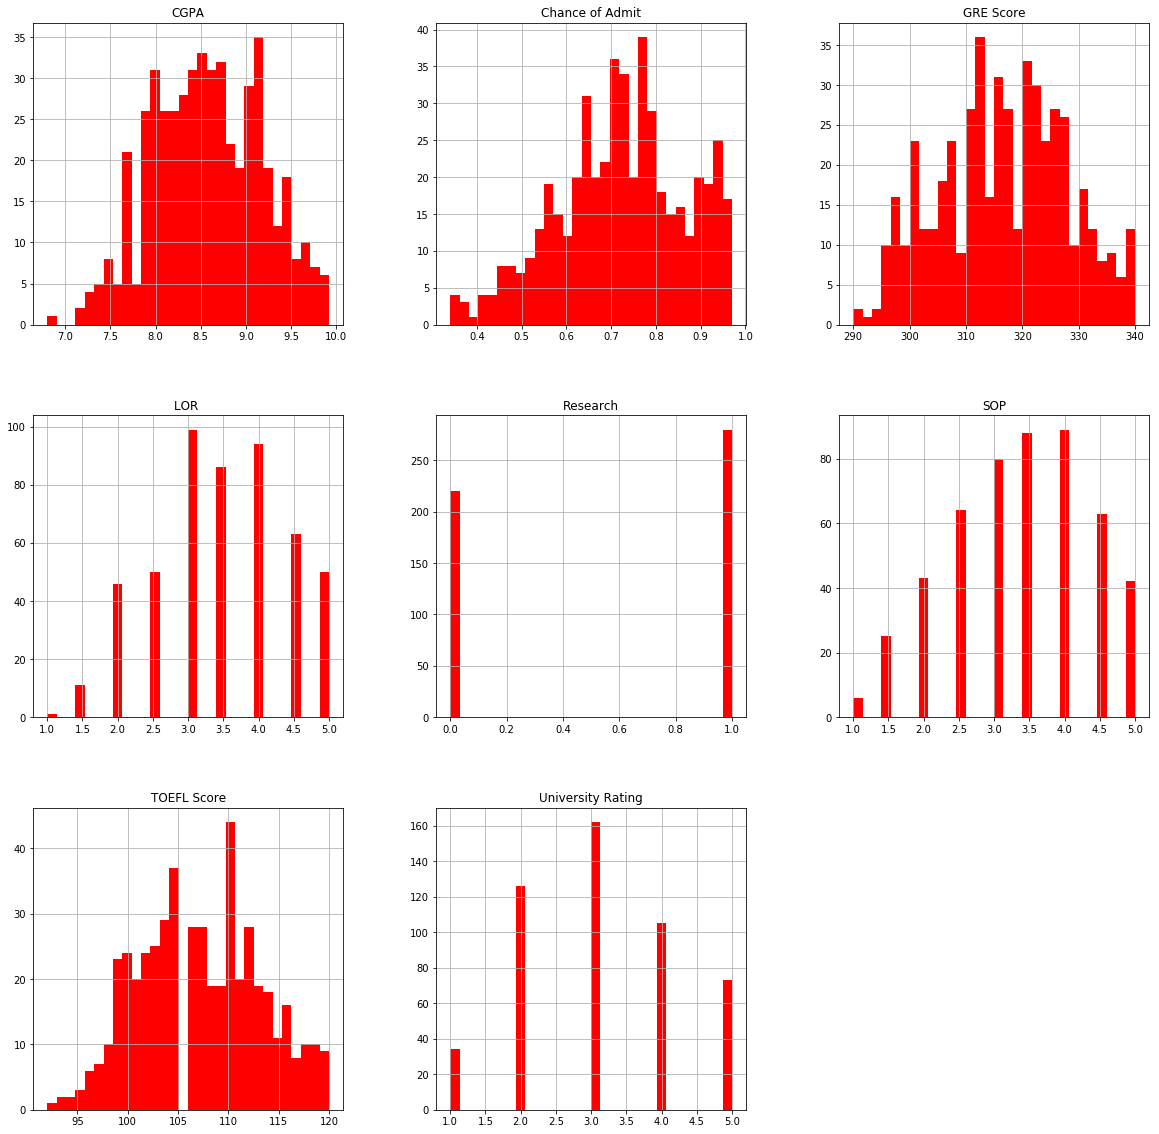

In [9]:
admission_df.hist(bins=30,figsize=(20,20),color='r')

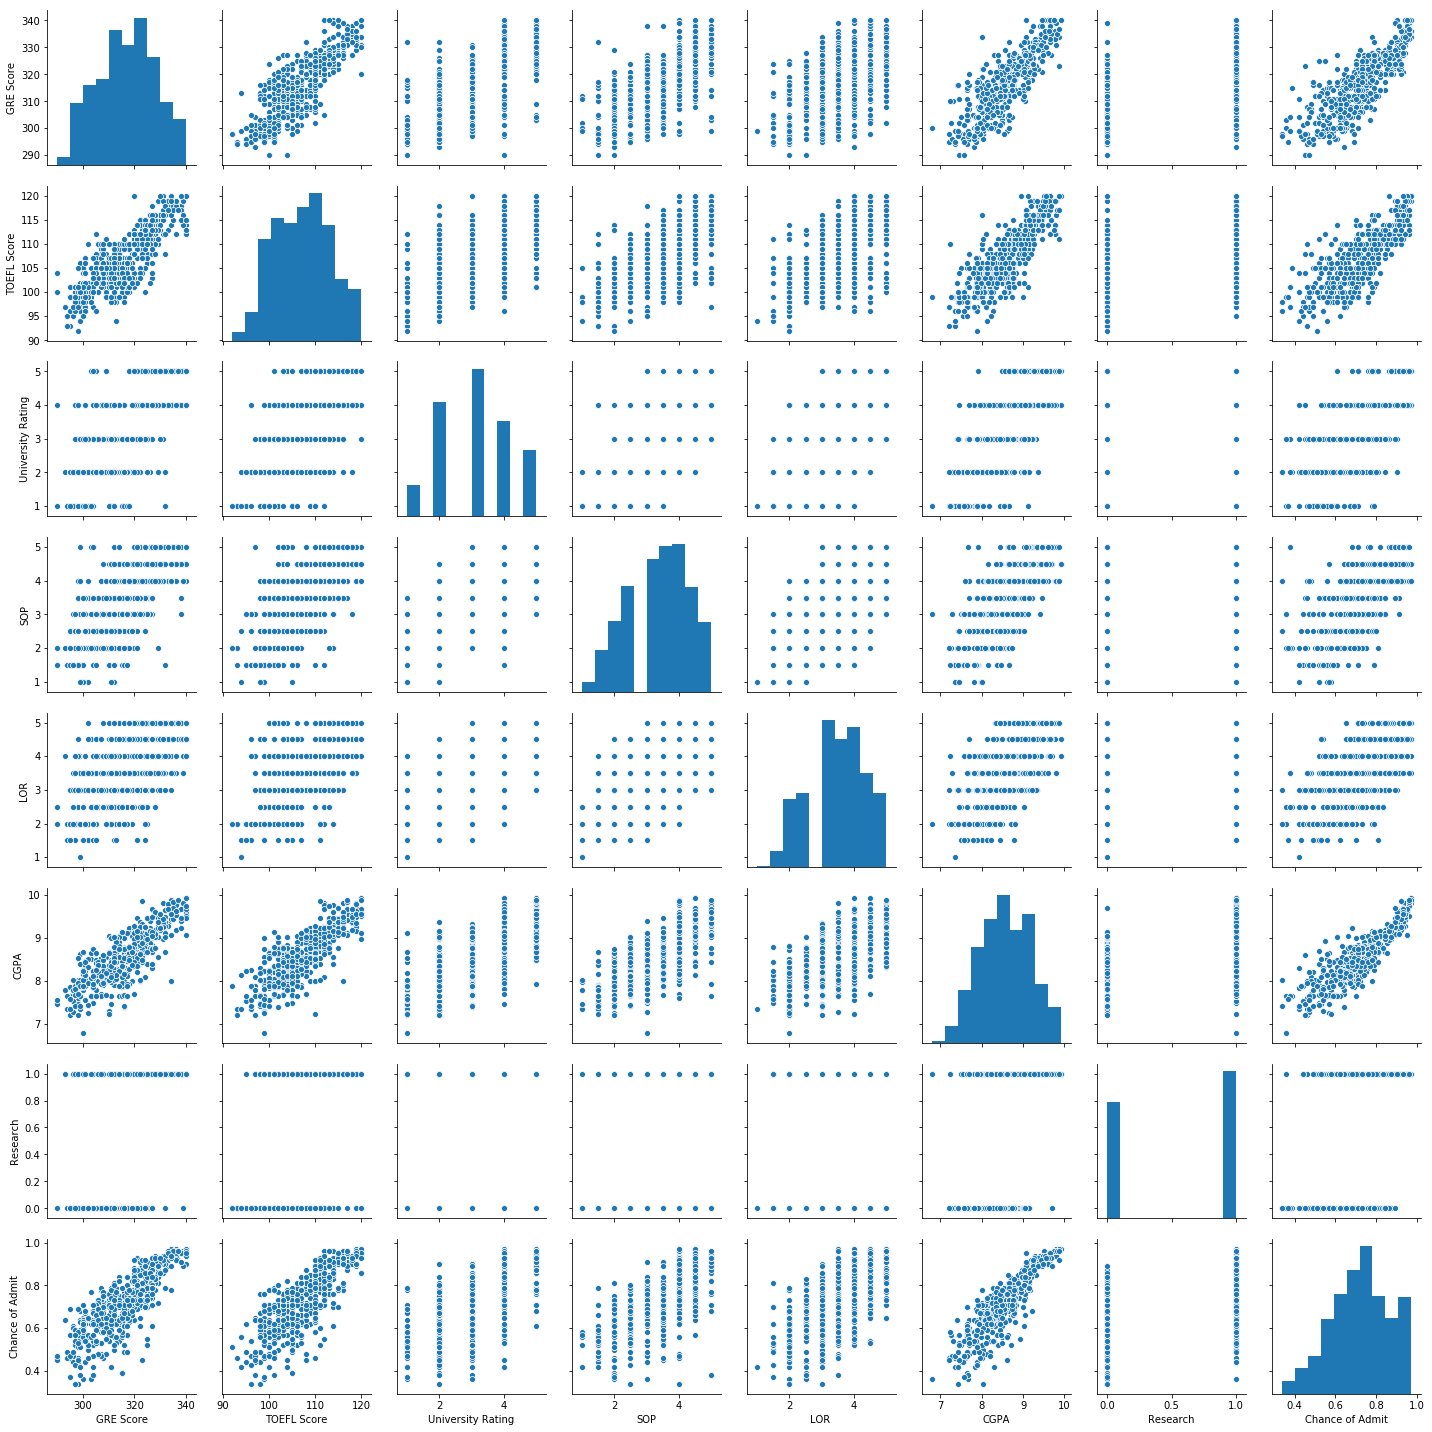

In [10]:
sns.pairplot(admission_df)

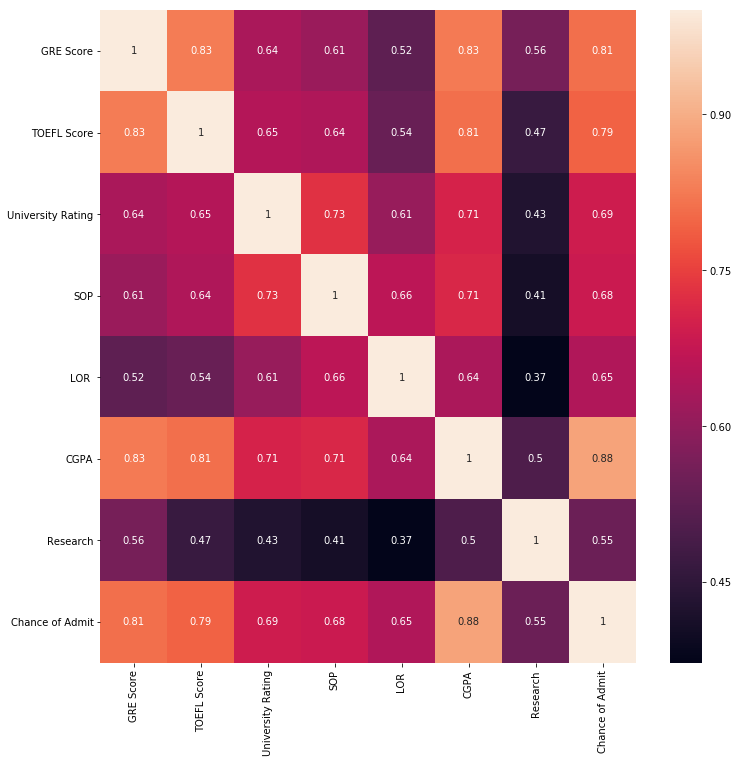

In [11]:
corr_matrix=admission_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix,annot=True)
plt.show()

# Create Training and Testing Dataset

In [12]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [13]:
X = admission_df.drop(columns=['Chance of Admit'])

In [14]:
y=admission_df['Chance of Admit']

In [15]:
X.shape

(500, 7)

In [16]:
y.shape

(500,)

In [17]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
5      0.90
6      0.75
7      0.68
8      0.50
9      0.45
10     0.52
11     0.84
12     0.78
13     0.62
14     0.61
15     0.54
16     0.66
17     0.65
18     0.63
19     0.62
20     0.64
21     0.70
22     0.94
23     0.95
24     0.97
25     0.94
26     0.76
27     0.44
28     0.46
29     0.54
       ... 
470    0.87
471    0.64
472    0.90
473    0.67
474    0.67
475    0.59
476    0.62
477    0.65
478    0.71
479    0.79
480    0.80
481    0.78
482    0.83
483    0.71
484    0.73
485    0.70
486    0.68
487    0.79
488    0.76
489    0.65
490    0.67
491    0.54
492    0.53
493    0.62
494    0.68
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [18]:
X=np.array(X)
y=np.array(y)

In [19]:
y=y.reshape(-1,1)
y.shape

(500, 1)

In [20]:
# scaling the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x=StandardScaler()
X=scaler_x.fit_transform(X)

In [21]:
scaler_y=StandardScaler()
y=scaler_y.fit_transform(y)

In [22]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

#  TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score


In [24]:
LinearRegression_model=LinearRegression()
LinearRegression_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
accuracy_LinearRegression=LinearRegression_model.score(X_test,y_test)
accuracy_LinearRegression

0.748144479162757

#  TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam


In [27]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))

ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_______________________________________

In [28]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [ ]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
425/425 [==============================] - 27s 63ms/sample - loss: 0.5583
Epoch 2/100
425/425 [==============================] - 28s 66ms/sample - loss: 0.2913
Epoch 3/100
425/425 [==============================] - 28s 67ms/sample - loss: 0.2853
Epoch 4/100
425/425 [==============================] - 28s 65ms/sample - loss: 0.2405
Epoch 5/100
425/425 [==============================] - 28s 66ms/sample - loss: 0.2581
Epoch 6/100
425/425 [==============================] - 27s 65ms/sample - loss: 0.2405
Epoch 7/100
425/425 [==============================] - 27s 64ms/sample - loss: 0.2519
Epoch 8/100
425/425 [==============================] - 27s 63ms/sample - loss: 0.2281
Epoch 9/100
425/425 [==============================] - 26s 61ms/sample - loss: 0.2302
Epoch 10/100
425/425 [==============================] - 28s 66ms/sample - loss: 0.2133
Epoch 11/100
425/425 [==============================] - 28s 66ms/sample - loss: 0.2110
Epoc

In [ ]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

In [ ]:
epochs_hist.history.keys()

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

# TASK #8: TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

In [ ]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.
# Great resource: https://www.saedsayad.com/decision_tree_reg.htm
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model=DecisionTreeRegressor()
DecisionTree_model.fit(X_train,y_train)

In [ ]:
accuracy_DecisionnTree = DecisionTree_model.score(X_test,y_test)
accuracy_DecisionnTree

### Many decision Trees make up a random forest model which is an ensemble model. 
### Predictions made by each decision tree are averaged to get the prediction of random forest model.
### A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model=RandomForestRegressor(n_estimators=100,max_depth=10)
RandomForest_model.fit(X_train,y_train)

In [ ]:
accuracy_RandomForest=RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

#  UNDERSTAND VARIOUS REGRESSION KPIs

# CALCULATE REGRESSION MODEL KPIs

In [ ]:
y_predict=LinearRegression_model.predict(X_test)
plt.plot(y_test,y_predict,'^',color='r')

In [ ]:
y_predict_orig=scaler_y.inverse_transform(y_predict)
y_test_orig=scaler_y.inverse_transform(y_test)

In [ ]:
plt.plot(y_test_orig,y_predict_orig,'^',color='r')

In [ ]:
k = X_test.shape[1]
n = len(X_test)
n

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 
